In [116]:
# Import libs
import pandas as pd
import numpy as np
import seaborn as sns

In [43]:
# Pandas options
pd.options.display.max_columns = None

In [44]:
# Loading dataset
df = pd.read_csv('tp/twitter_gender.csv', encoding='latin-1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [108]:
# Filtering dataset
# Removing all columns containing text
filtered = df.drop(['_unit_id',
                    '_unit_state',
                    '_last_judgment_at',
                    'created',
                    'description',
                    'gender_gold',
                    'name',
                    'profile_yn_gold',
                    'profileimage',
                    'text',
                    'tweet_coord',
                    'tweet_created',
                    'tweet_id',
                    'tweet_location',
                    'user_timezone'], axis=1)

filtered = filtered.drop('gender:confidence', axis=1)

# Converting all columns with bool to int
filtered["_golden"] = filtered["_golden"].astype(int)
filtered.profile_yn = filtered.profile_yn.map(dict(yes=1, no=0))
def hex2int(column):
    for i in range(len(column)):
        try:
            column[i] = int(column[i], 16)
        except ValueError:
            column[i] = 0

# Commented line below doesn't work because some row are not in hex
# filtered.link_color = filtered.link_color.apply(int, base=16)
hex2int(filtered.link_color)
hex2int(filtered.sidebar_color)

# Converting male and female to 1 and 0
filtered.gender = filtered.gender.map(dict(male=1, female=0))

<ipython-input-108-77941e3c8626>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i] = int(column[i], 16)
<ipython-input-108-77941e3c8626>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i] = 0


In [112]:
# Removing NaN
filtered = filtered.dropna()
filtered

,_golden,_trusted_judgments,gender,profile_yn,profile_yn:confidence,fav_number,link_color,retweet_count,sidebar_color,tweet_count
0,0,3,1.0,1,1.0,0,574146,0,16777215,110964
1,0,3,1.0,1,1.0,68,33972,0,12639981,7471
2,0,3,1.0,1,1.0,7696,11253954,1,12639981,5617
3,0,3,1.0,1,1.0,202,33972,0,12639981,1693
4,0,3,0.0,1,1.0,37318,3904729,0,0,31462
...,...,...,...,...,...,...,...,...,...,...
20045,1,259,0.0,1,1.0,302,33972,0,12639981,783
20046,1,248,1.0,1,1.0,2513,13613353,0,0,13523
20047,1,264,1.0,1,1.0,50,33972,0,12639981,26419
20048,1,250,0.0,1,1.0,70804,9594572,0,0,56073


In [119]:
# Isolating X and Y
X = filtered.drop('gender', axis=1)
Y = filtered['gender']
X

,_golden,_trusted_judgments,profile_yn,profile_yn:confidence,fav_number,link_color,retweet_count,sidebar_color,tweet_count
0,0,3,1,1.0,0,574146,0,16777215,110964
1,0,3,1,1.0,68,33972,0,12639981,7471
2,0,3,1,1.0,7696,11253954,1,12639981,5617
3,0,3,1,1.0,202,33972,0,12639981,1693
4,0,3,1,1.0,37318,3904729,0,0,31462
...,...,...,...,...,...,...,...,...,...
20045,1,259,1,1.0,302,33972,0,12639981,783
20046,1,248,1,1.0,2513,13613353,0,0,13523
20047,1,264,1,1.0,50,33972,0,12639981,26419
20048,1,250,1,1.0,70804,9594572,0,0,56073


In [167]:
# Split train test
from sklearn.model_selection import train_test_split

X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, random_state=97, stratify=Y)

/home/yassin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

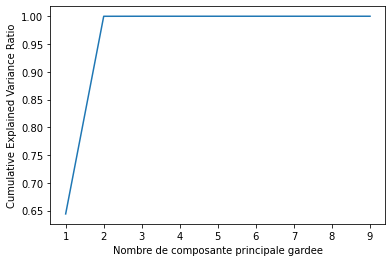

In [130]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

import matplotlib.pyplot as plt
cumsum = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot([x for x in range(1, X.shape[1] + 1)], cumsum)
plt.xlabel('Nombre de composante principale gardee')
plt.ylabel('Cumulative Explained Variance Ratio')

In [157]:
# Accuracy
acc = lambda p, t: (p == t).sum() / t.shape[0]

In [168]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=97)
knn.fit(X_tr, Y_tr)
preds = knn.predict(X_te)
acc(preds, Y_te)

0.6116625310173698

In [169]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier as RFC
rf = RFC()
rf.fit(X_tr, Y_tr)
preds = rf.predict(X_te)
acc(preds, Y_te)

0.5852977667493796

In [170]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier as MLPC
mlpc = MLPC()
mlpc.fit(X_tr, Y_tr)
preds = mlpc.predict(X_te)
acc(preds, Y_te)

0.5145781637717122